In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential

import os 
os.environ["KERAS_BACKEND"] = "jax" 
import keras

In [22]:
df=pd.read_csv('labels.csv')

In [23]:
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [24]:
df.shape

(10222, 2)

In [25]:
breeds_all=df["breed"]
breed_counts=breeds_all.value_counts()
breed_counts.head(10)

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
great_pyrenees          111
pomeranian              111
basenji                 110
samoyed                 109
Name: count, dtype: int64

In [26]:
# selecting first 3 breed due to less computation power
class_names=['scottish_deerhound','maltese_dog','afghan_hound']
labels=df[(df['breed'].isin(class_names))]
labels=labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,146,0379145880ad3978f9b80f0dc2c03fba,afghan_hound


In [27]:
X_data = np.zeros((len(labels),224,224,3),dtype='float32')
Y_data = label_binarize(labels['breed'],classes=class_names)


for i in tqdm(range(len(labels))):
    img = image.load_img('train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0
    
print('\nTrain Images shape:',X_data.shape,'size: {:,}'.format(X_data.size))
print('one hot encoded output shape:',Y_data.shape,'size: {:,}'.format(Y_data.size))


100%|███████████████████████████████████████████████████████████████████████████████| 359/359 [00:02<00:00, 151.56it/s]


Train Images shape: (359, 224, 224, 3) size: 54,039,552
one hot encoded output shape: (359, 3) size: 1,077


In [28]:
# As we are working with the classification dataset first we need to one hot encode the target value i.e. the classes.
# After that we will read images and convert them into numpy array and finally normalizing the array.

In [29]:
# model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation  = 'relu', kernel_regularizer ='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(7,7), activation  = 'relu', kernel_regularizer ='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=8, kernel_size=(5,5), activation  = 'relu', kernel_regularizer ='l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation="relu",kernel_regularizer='l2'))
model.add(Dense(64, activation="relu",kernel_regularizer='l2'))
model.add(Dense(len(class_names), activation="softmax"))

model.compile(loss='categorical_crossentropy',optimizer=Adam(0.0001),metrics=['accuracy'])

model.summary()


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 220, 220, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 110, 110, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 108, 108, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 48, 48, 16)          │          25,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 20, 20, 8)           │           3,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162,619 (635.23 KB)

 Trainable params: 162,619 (635.23 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# we will create architecture

In [31]:
# splitting the data set into training and testing data set
X_train_and_val, X_test , Y_train_and_val, Y_test = train_test_split(X_data,Y_data, test_size=0.1)
# splitting the training data into training and validation data sets
X_train,X_val,Y_train,Y_val= train_test_split(X_train_and_val, Y_train_and_val, test_size=0.2)

In [32]:
epochs=200
batch_Size=128

history=model.fit(X_train,Y_train,batch_size=batch_Size,epochs=epochs,validation_data=(X_val,Y_val))

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.3171 - loss: 4.9000 - val_accuracy: 0.3692 - val_loss: 4.8669
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3512 - loss: 4.8628 - val_accuracy: 0.4000 - val_loss: 4.8326
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3482 - loss: 4.8287 - val_accuracy: 0.3692 - val_loss: 4.7989
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.3347 - loss: 4.7946 - val_accuracy: 0.3538 - val_loss: 4.7653
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3142 - loss: 4.7626 - val_accuracy: 0.3538 - val_loss: 4.7328
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3288 - loss: 4.7301 - val_accuracy: 0.3538 - val_loss: 4.7015
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3823 - loss: 4.6982 - val_accuracy: 0.3385 - val_loss: 4.6711
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3910 - loss: 4.6668 - val_accuracy: 0.3692 - val_loss: 4.6399
Epoch 

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4387 - loss: 3.5403 - val_accuracy: 0.4462 - val_loss: 3.5320
Epoch 53/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5204 - loss: 3.4884 - val_accuracy: 0.4769 - val_loss: 3.5130
Epoch 54/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4844 - loss: 3.4841 - val_accuracy: 0.4308 - val_loss: 3.5107
Epoch 55/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4747 - loss: 3.4787 - val_accuracy: 0.4308 - val_loss: 3.4964
Epoch 56/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4708 - loss: 3.4649 - val_accuracy: 0.4308 - val_loss: 3.4750
Epoch 57/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.4640 - loss: 3.4471 - val_accuracy: 0.4462 - val_loss: 3.4534
Epoch 58/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4757 - loss: 3.4290 - val_accuracy: 0.4308 - val_loss: 3.4300
Epoch 59/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4815 - loss: 3.3995 - val_accuracy: 0.4923 - val_loss: 3.3943
Epoch 60/200


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5769 - loss: 2.7711 - val_accuracy: 0.5231 - val_loss: 2.9523
Epoch 104/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5954 - loss: 2.7719 - val_accuracy: 0.5692 - val_loss: 2.9274
Epoch 105/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.6167 - loss: 2.7622 - val_accuracy: 0.5692 - val_loss: 2.8645
Epoch 106/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6381 - loss: 2.7306 - val_accuracy: 0.6154 - val_loss: 2.8358
Epoch 107/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6420 - loss: 2.7164 - val_accuracy: 0.6462 - val_loss: 2.8174
Epoch 108/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6401 - loss: 2.6955 - val_accuracy: 0.5231 - val_loss: 2.8221
Epoch 109/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5904 - loss: 2.7086 - val_accuracy: 0.5231 - val_loss: 2.8214
Epoch 110/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5739 - loss: 2.7167 - val_accuracy: 0.5231 - val_loss: 2.8112
Epoch 

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6849 - loss: 2.3294 - val_accuracy: 0.5692 - val_loss: 2.6422
Epoch 155/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6498 - loss: 2.3409 - val_accuracy: 0.6000 - val_loss: 2.6144
Epoch 156/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6586 - loss: 2.2871 - val_accuracy: 0.5231 - val_loss: 2.6108
Epoch 157/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6586 - loss: 2.2818 - val_accuracy: 0.5385 - val_loss: 2.6593
Epoch 158/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6488 - loss: 2.3235 - val_accuracy: 0.5385 - val_loss: 2.6883
Epoch 159/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6429 - loss: 2.3122 - val_accuracy: 0.5385 - val_loss: 2.6352
Epoch 160/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6722 - loss: 2.2557 - val_accuracy: 0.6000 - val_loss: 2.6705
Epoch 161/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6556 - loss: 2.2587 - val_accuracy: 0.6154 - val_loss: 2.7030
Epoch 

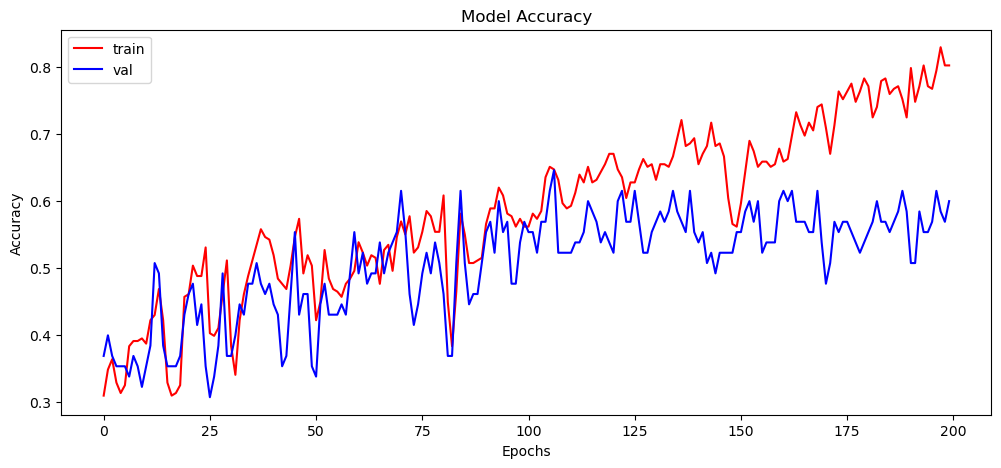

In [33]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [34]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4525 - loss: 2.7264 
Accuracy over the test set: 
  44.44 %


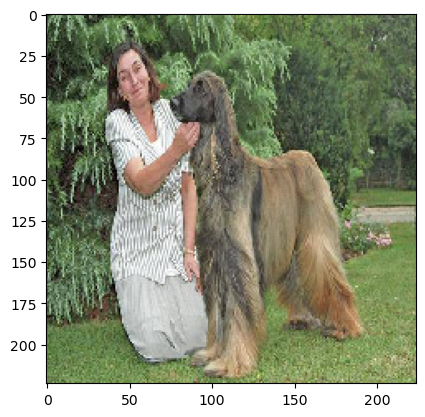

Originally :  scottish_deerhound
Predicted :  scottish_deerhound


In [35]:
# Plotting image to compare
plt.imshow(X_test[1,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(Y_test[1])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[1])])

In [36]:
model.save("dog_breed.h5")